In [19]:
# Zadanie 1

from scipy import special
import random

# prawdopodobienstwo wylosowania czworki
print(special.binom(6,4) * special.binom(43,2) / special.binom(49,6))
# prawdopodobienstwo wylosowania piatki
print(special.binom(6,5) * special.binom(44,1) / special.binom(49,6))

# zwycieskie liczby
winning_numbers = random.sample(range(1,50), k=6)
print(winning_numbers)

# symulacja losowań
successes4 = 0
successes5 = 0
for i in range(10000):
    numbers = random.sample(range(1,50), k=6)
    draw_successes = 0
    for num in numbers:
        if num in winning_numbers:
            draw_successes += 1
            
    if draw_successes == 4:
        successes4 += 1
    if draw_successes == 5:
        successes5 += 1
        
print("Prawdopodobienstwo czworki")
print( successes4 / 10000 )
print("Prawdopodobienstwo piatki")
print( successes5 / 10000)

print("Tak wartosci zgadzają się co do rzędu wielkości, a anomalie są spowodowane skończoną liczbą losowań")

successes4 = 0
successes5 = 0
for i in range(10000):
    numbers = random.sample(range(1,50), k=6)
    num_matches = len(set(numbers).intersection(set(winning_numbers)))
            
    if num_matches == 4:
        successes4 += 1
    if num_matches == 5:
        successes5 += 1
        
print("Prawdopodobienstwo czworki")
print( successes4 / 10000 )
print("Prawdopodobienstwo piatki")
print( successes5 / 10000)

0.000968619724401408
1.887896694292888e-05
[4, 2, 30, 12, 7, 28]
Prawdopodobienstwo czworki
0.001
Prawdopodobienstwo piatki
0.0
Tak wartosci zgadzają się co do rzędu wielkości, a anomalie są spowodowane skończoną liczbą losowań
Prawdopodobienstwo czworki
0.0008
Prawdopodobienstwo piatki
0.0


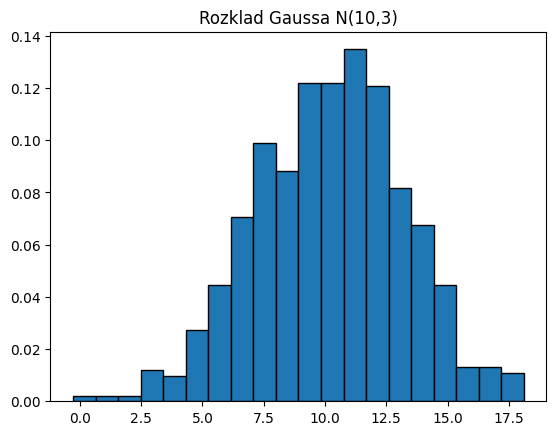

In [20]:
# Zadanie 2

import numpy as np
import matplotlib.pyplot as plt

# generowanie próbek i histogram
X = np.random.normal(10, 3, size=1000)
plt.hist(X, bins=20, edgecolor="black", density=True)
plt.title("Rozklad Gaussa N(10,3)")
plt.show()

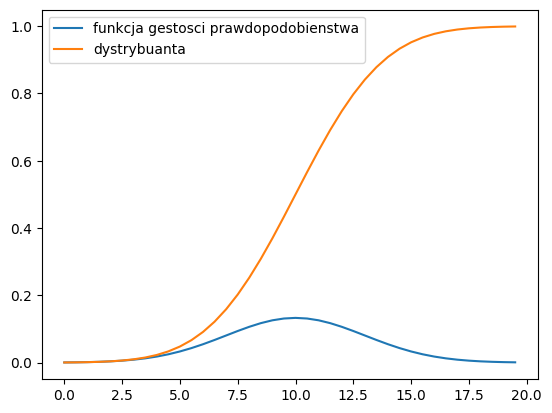

In [21]:
from scipy import stats

x = np.arange(0, 20, 0.5)
# pdf
y1 = stats.norm.pdf(x, 10, 3)
# cdf
y2 = stats.norm.cdf(x, 10, 3)

plt.plot(x,y1, label="funkcja gestosci prawdopodobienstwa")
plt.plot(x,y2, label="dystrybuanta")
plt.legend()
plt.show()

In [22]:
# Zadanie 3

mu = 172
sigma = 6
x1 = 190
x2 = 200

# uzycie wzoru z = x - mu / sigma
z1 = (x1 - mu) / sigma
z2 = (x2 - mu) / sigma
print(z1, z2)

from scipy import stats

# dystrybuanta rozkladu normalnego
P = stats.norm.cdf(z2) - stats.norm.cdf(z1)
print(P)

3.0 4.666666666666667
0.0013483674048935246


In [1]:
# Zadanie 4a

import numpy as np
from scipy.stats import t

n = 9
X = [45, 66, 75, 34, 60, 72, 55, 30, 85]
alpha = 0.1

# obliczenie sredniej probki
X_mean = np.mean(X)
print(X_mean)

# obliczenie odchylenia standardowego
s = np.std(X, ddof=1)

# wartosc krytyczna rozkładu t-studenta
t_alpha = t.ppf(1-alpha/2, n-1)

print("Przedzial ufnosci")
print("P1=", X_mean - t_alpha * s / np.sqrt(n))
print("P2=", X_mean + t_alpha * s / np.sqrt(n))


39.81818181818182
Przedzial ufnosci
P1= 20.571316674867003
P2= 59.065046961496634


In [24]:
# Zadanie 4b
n = 40
p0 = 0.8
# wspolczynnik ufnosci 95%
alpha = 0.05
d = 0.05

# wartosc krytyczna rozkładu normalnego
from scipy.stats import norm
u_alpha = norm.ppf(1 - alpha/2)

# obliczenie minimalnej liczby prob
print("Minimalna liczebnosc")
print(np.ceil((u_alpha**2) * p0 * (1-p0) / (d**2) ))


Minimalna liczebnosc
246.0


In [25]:
# Zadanie 5

# H0: mu = mu_0
# H1: mu != mu_0

mu_0 = 200
sigma = 5
X_mean = 195
alpha = 0.01
n = 50

# wartość statystyki testowej U
U = (X_mean - mu_0) / sigma * np.sqrt(n)
print("U=", U)

# zbiór krytyczny dwustronny bo H1 - różność
from scipy.stats import norm
u_alpha = norm.ppf(1 - alpha / 2)
print(f"Zbiór krytyczny: (-inf, -{u_alpha}) ∪ ({u_alpha}, +inf)")

# decyzja
if U < -u_alpha or U > u_alpha:  # warunek na zawieranie się w zbiorze
    print(f"Na poziomie istotności {alpha} można odrzucić H0")
else:
    print(f"Na poziomie istotności {alpha} nie ma podstaw do odrzucenia H0")

U= -7.0710678118654755
Zbiór krytyczny: (-inf, -2.5758293035489004) ∪ (2.5758293035489004, +inf)
Na poziomie istotności 0.01 można odrzucić H0
